<a href="https://colab.research.google.com/github/karabomn/OMM/blob/main/Engineering_physics_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Генерация биномиального распределения

In [8]:
p = 2/3
q = 1 - p
n = 8
N = 1000000
ans = 0

x = np.zeros(N, int)

def C_n_k (k):
    return math.factorial(n) / (math.factorial(k) * math.factorial(n - k))

for i in range(0,N):
    r = random.random()
    ans = 0
    pr = q**n
    while(r > pr):
        ans += 1
        r -= pr
        pr = C_n_k(ans) * (p**ans) * (q**(n-ans))
    x[i] = ans

f = np.zeros(9)
y_i = np.arange(0,9)

for i in range(0,9):
    f[i] = C_n_k(i) * (p**(i)) * (q**(n-i)) * 100

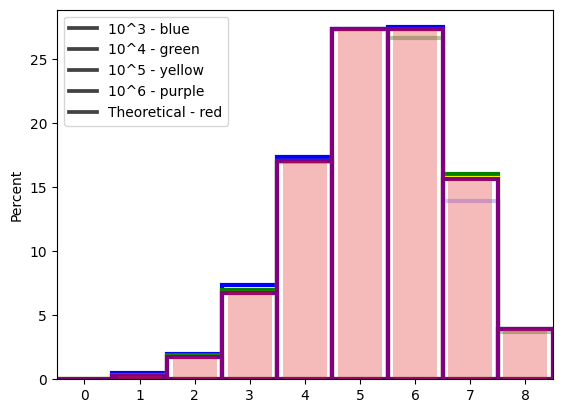

In [9]:
sns.histplot(x[:1000], bins = 9, discrete = True, stat = 'percent',edgecolor = 'blue', color = 'white', linewidth = 3, alpha = 0.4, legend = False)
sns.histplot(x[:10000], bins = 9, discrete = True, stat = 'percent', edgecolor = 'green', color = 'white', linewidth = 3, alpha = 0.4, legend = True)
sns.histplot(x[:100000], bins = 9, discrete = True, stat = 'percent', edgecolor = 'yellow', color = 'white', linewidth = 3, alpha = 0.4, legend = True)
sns.histplot(x, bins = 9, discrete = True, stat = 'percent', edgecolor = 'purple', color = 'white', linewidth = 3, alpha = 0.4, legend = True)
sns.barplot(x = y_i, y = f, color = 'red', alpha = 0.3, linewidth = 0.1)
plt.legend(loc='upper left', labels=['10^3 - blue', '10^4 - green', '10^5 - yellow', '10^6 - purple', 'Theoretical - red'])

# Генерация нормального распределения

In [10]:
N_n = 10000
n = np.zeros(N_n)

for i in range(0, N_n):
    u = 1
    v = 1
    s = u**2 + v**2
    while s >= 1:
        u = 2 * random.random() - 1
        v = 2 * random.random() - 1
        s = u**2 + v**2
    n[i] = u * math.sqrt(- 2 * math.log(s) / s)

In [11]:
def Normalf(ad):
    return math.exp(- ad**2 / 2) / math.sqrt(2 * math.pi)

<Axes: ylabel='Frequency'>

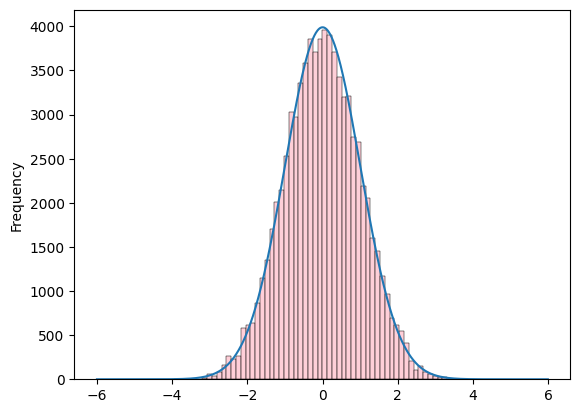

In [12]:
t = np.arange(-6, 6, 0.01)
u = np.zeros(len(t))
for i in range(0, len(t)):
    u[i] = Normalf(t[i]) * N_n

plt.plot(t, u)
sns.histplot(n, stat = 'frequency', color = 'pink')